## Table of Contents  

## Introduction<a id='2.2_Introduction'></a>

### Problem: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

Educational inequities persist across various school districts in Texas, potentially impacting student academic performance and long-term success. Despite the state's efforts to allocate funding based on Average Daily Attendance (ADA), disparities in student attendance and the consequent variation in funding raise concerns about the adequacy of resources available to each student. The core issue is whether the differences in funding, when adjusted for actual attendance versus enrollment, correlate with academic outcomes and whether this could be a contributing factor to the educational inequities lurking beneath the surface of Texas' complex system. 

### Project: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

This data science project aims to examine the relationship between various educational variables -- school district funding in particular -- and student academic performance in Texas. By leveraging detailed financial, attendance, and academic data from the Texas Education Agency (TEA), the project seeks to identify patterns and correlations that could inform policy decisions and interventions aimed at reducing educational disparities. The hypothesis under investigation posits that higher levels of funding, particularly when accounting for attendance discrepancies, are associated with enhanced student performance.

### Clients: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The findings of this study will be of interest to a broad range of stakeholders, including educational policymakers, school district administrators, teachers, parents, and students. It will particularly benefit decision-makers within the TEA and local educational authorities who are responsible for allocating resources and designing strategies to improve educational equity and outcomes across Texas.

### Data: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The datasets for this project are drawn from a few sources such as the U.S. Census Bureau and WalletHub, but they're primarily sourced from the TEA. The TEA provides comprehensive records on school district funding, student attendance rates, and various academic performance indicators. The data will be gathered and analyzed on a per-school district basis. The analysis will incorporate several features, including but not limited to, the level of funding per student, attendance rates, curriculum quality, and student-to-teacher ratios. Each feature will be carefully selected and processed to ensure the integrity and validity of the analysis. The primary goal is to develop a predictive model that accurately reflects the complex dynamics between school district funding and student success while highlighting any significant disparities that warrant attention.


**Texas Education Agency (TEA):** 
* 4-Yr HS Graduation Rates: https://tea.texas.gov/reports-and-data/school-performance/accountability-research/completion-graduation-and-dropout/four-year-graduation-and-dropout-data-class-of-2022 
* SAT-ACT Data: https://tea.texas.gov/reports-and-data/school-performance/accountability-research/satact/sat-and-act-data-class-of-2022 
* District Funding Totals: https://tea.texas.gov/finance-and-grants/state-funding/state-funding-reports-and-data/peims-financial-data-downloads 
* District Property Values: https://tea.texas.gov/finance-and-grants/state-funding/state-funding-reports-and-data/peims-financial-standard-reports 
* AP-IB Scores & Participation: https://tea.texas.gov/reports-and-data/school-performance/accountability-research/apib/advanced-placement-and-international-baccalaureate-data-2021-22 
* Teacher Count and Avg Salary: https://rptsvr1.tea.texas.gov/adhocrpt/adpeb.html 
* Average Daily Attendance (ADA): https://rptsvr1.tea.texas.gov/adhocrpt/adpeb.html 


**U.S. Census Bureau:**
* Kids in Poverty by District: https://www.census.gov/data/datasets/2022/demo/saipe/2022-school-districts.html 


**WalletHub:**
* Median Incomes per District: https://wallethub.com/edu/e/most-least-equitable-school-districts-in-texas/77134 


## 1. Data Wrangling

### Imports: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

In [201]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

### Objectives: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

There are some fundamental questions to resolve: 

* What data is required to tackle this project? 
    * Required target value
    * Potentially useful features
* Do we have any fundamental issues with the data?

### Load the Data: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

To begin, we import all nine Excel files using the read_excel function from the pandas package. We then conduct a preliminary scan of the data. Each dataset varies considerably in their number of columns and rows. We're interested in a current snapshot of the educational landscape, so we'll analyze one-year data for 2022 since this is the most recent data available across datasets. 

In [202]:
# 4-Yr HS Graduation Rates
hs_graduation_filepath = 'HS Graduation Rates -- TEA Data 4yr-2022.xlsx'
hs_graduation_data_sheet = 'Data'  
hs_graduation_data_df = pd.read_excel(hs_graduation_filepath, sheet_name=hs_graduation_data_sheet)
hs_graduation_data_df.head(3)

,CALC_FOR_STATE_ACCT,District ID,District Name,COUNTY,CNTYNAME,REGION,REGNNAME,DIST_ALLD,DIST_ALLN_CMP2,DIST_ALLN_GRAD,...,DIST_TTLN_CONT,DIST_TTLN_TXCHSE,DIST_TTLN_DROP,DIST_TTLR_CMP2,DIST_TTLR_GRAD,DIST_TTLR_CONT,DIST_TTLR_TXCHSE,DIST_TTLR_DROP,DIST_TTLR_RAED,DIST_EXCL
0,No,1902,Cayuga ISD,1,Anderson County,7,Kilgore,46,45,45,...,0,0,1,97.8,97.8,0.0,0.0,2.2,97.8,0
1,Yes,1902,Cayuga ISD,1,Anderson County,7,Kilgore,46,45,45,...,0,0,1,97.8,97.8,0.0,0.0,2.2,97.8,0
2,No,1903,Elkhart ISD,1,Anderson County,7,Kilgore,70,70,70,...,0,0,0,100.0,100.0,0.0,0.0,0.0,100.0,0


In [203]:
# SAT-ACT Scores
sat_act_filepath = 'SAT-ACT Scores by District (2022) -- TEA Data.xlsx' 
sat_act_data_sheet = 'Data' 
sat_act_data_df = pd.read_excel(sat_act_filepath, sheet_name=sat_act_data_sheet)
sat_act_data_df.head(3)

,Group,District ID,District Name,County,County Name,Region,RegnName,Grads_Mskd,Exnees_Mskd,Part_Rate,Crit_Mskd,Above_Crit_Rate,TSI_Both_Mskd,Above_TSI_Both_Rate
0,All Students,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<50,<50,63.0,<25,10.3,<25,27.6
1,African American,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,100.0,<25,NaN,<25,100.0
2,American Indian,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,NaN,<25,NaN,<25,NaN


In [204]:
# District Funding Totals
peims_funding_filepath = 'PEIMS District Funding Totals 2007-2022.xlsx'
peims_funding_data_sheet = 'Data'  
peims_funding_data_df = pd.read_excel(peims_funding_filepath, sheet_name=peims_funding_data_sheet)
peims_funding_data_df.head(3)

,District ID,District Name,YEAR,GEN FUNDS-LOCAL TAX REVENUE FROM M&O,ALL FUNDS-LOCAL TAX REVENUE FROM M&O,GEN FUNDS-STATE REVENUE,ALL FUNDS-STATE REVENUE,GEN FUNDS-FEDERAL REVENUE,ALL FUNDS-FEDERAL REVENUE,GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE,...,ALL FUNDS-TOTAL OTHER USES,GEN FUNDS-INTERGOVERN CHARGES EXPEND,ALL FUNDS-INTERGOVERN CHARGES EXPEND,GEN FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,ALL FUNDS-DEBT SERVICE (OBJECT 6500) FOR TD,GEN FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,ALL FUNDS-CAPITAL PROJECTS(OBJECT 6600) FOR TD,GEN FUNDS-TOTAL DISBURSEMENTS,ALL FUNDS-TOTAL DISBURSEMENTS,FALL SURVEY ENROLLMENT
0,1902,CAYUGA ISD,2007,4122552,4122552,1114179,1176283,0,250168,215239,...,5829,70703,70703,421865,421865,145130,156886,4907206,5348377,569
1,1902,CAYUGA ISD,2008,3641351,3641351,1845232,2350131,0,1852221,183293,...,15000,75304,210304,0,0,647852,632398,5391975,8274772,580
2,1902,CAYUGA ISD,2009,3319164,3319164,1950169,2473373,0,1714988,123568,...,0,166251,166251,0,0,722766,803313,6006273,8819439,594


In [205]:
# District Property Values
property_values_filepath = 'PEIMS Tax Rates, Property Values, Property Values Per Pupil (2022) -- TEA Data.xlsx'
property_values_data_sheet = 'Data'  
property_values_data_df = pd.read_excel(property_values_filepath, sheet_name=property_values_data_sheet)
property_values_data_df.head(3)

,District ID,District Name,M&O Tax Rate,I&S Tax Rate,Total Tax Rate,Total Property Value,Total Property Value per pupil,Local Funding per Pupil,Business Property Value,Residential Property Value,Land Property Value,Oil and Gas Property Value,Other Property Value
0,109901,Abbott ISD,0.9321,0.2824,1.2145,115843601,410792.911348,4989.079908,46146930,31334380,14204919,0,564800
1,95901,Abernathy ISD,1.0517,0.3300,1.3817,465947826,568229.056098,7851.220868,311422590,104120735,23994789,55075540,2879446
2,221901,Abilene ISD,0.9249,0.3535,1.2784,5394710556,353195.662957,4515.253355,2359455936,3840796038,57215187,12503395,64347904


In [206]:
# AP-IB Scores & Participation
ap_ib_scores_filepath = 'AP-IB Scores & Participation Data 2021-22 | Texas Education Agency.xlsx'
ap_ib_scores_data_sheet = 'Data'  
ap_ib_scores_data_df = pd.read_excel(ap_ib_scores_filepath, sheet_name=ap_ib_scores_data_sheet)
ap_ib_scores_data_df.head(3)

,Group,District ID,District Name,County,CntyName,Region,RegnName,Students_Mskd,Exnees_Mskd,Part_Rate,Exnees_Crit_Mskd,Exnees_Above_Crit_Rate,Exams_Mskd,Exams_Crit_Mskd,Exams_Above_Crit_Rate
0,All Students,14909,Temple ISD,14,Bell County,12,Waco,"1,100",200,18.2,101,50.5,452,193,42.7
1,African American,14909,Temple ISD,14,Bell County,12,Waco,<300,<50,9.2,<25,25.9,49,12,24.5
2,American Indian,14909,Temple ISD,14,Bell County,12,Waco,<25,<25,NaN,<25,NaN,<25,<25,NaN


In [207]:
# Teacher Count and Avg Salary
peims_teacher_filepath = 'PEIMS Teacher Count & Avg Salary (2022)-- TEA Data.xlsx'
peims_teacher_data_sheet = 'Data'  
peims_teacher_data_df = pd.read_excel(peims_teacher_filepath, sheet_name=peims_teacher_data_sheet)
peims_teacher_data_df.head(3)

,Region,County,District ID,District Name,Charter Status,Staff_Category,Staff,FTE Count,Total Base Pay,Average Base Pay
0,10,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,OPEN ENROLLMENT CHARTER,TEACHING STAFF,PRE-KINDERGARTEN,12.48,652611.0,52282.0
1,10,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,OPEN ENROLLMENT CHARTER,TEACHING STAFF,KINDERGARTEN,10.64,536025.0,50372.0
2,10,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,OPEN ENROLLMENT CHARTER,TEACHING STAFF,KINDERGARTEN/ELEMENTARY (K-6),2.96,197545.0,66718.0


In [208]:
# Average Daily Attendance (ADA)
ada_filepath = 'ADA (Avg Daily Attendance) 2005-2023 -- TEA data.xlsx'
ada_data_sheet = 'Data'  
ada_data_df = pd.read_excel(ada_filepath, sheet_name=ada_data_sheet)
ada_data_df.head(3)

,County,County Name,District ID,District Name,2004-2005 ADA,2005-2006 ADA,2006-2007 ADA,2007-2008 ADA,2008-2009 ADA,2009-2010 ADA,...,2013-2014 ADA,2014-2015 ADA,2015-2016 ADA,2016-2017 ADA,2017-2018 ADA,2018-2019 ADA,2019-2020 ADA,2020-2021 ADA,2021-2022 ADA,2022-2023 ADA
0,178,NUECES COUNTY,178806,21ST CENTURY ACADEMY OF SCIENCE AN,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
1,57,DALLAS COUNTY,57816,A W BROWN LEADERSHIP ACADEMY,711.384,849.091,923.753,991.948,1047.546,1131.454,...,1657.226,1799.313,1818.267,1918.032,1731.535,1585.182,1324.525,1026.444,880.776,763.44
2,57,DALLAS COUNTY,57829,A+ ACADEMY,830.974,878.711,896.752,865.948,896.359,1038.276,...,933.890,910.002,904.325,995.942,1245.197,1300.150,1222.064,1285.841,1388.241,1400.47


In [209]:
# Kids in Poverty by District
kids_poverty_filepath = 'Kids in Poverty Per School District 2022 – U.S. Census Bureau.xlsx'
kids_poverty_data_sheet = 'Data'  
kids_poverty_data_df = pd.read_excel(kids_poverty_filepath, sheet_name=kids_poverty_data_sheet)
kids_poverty_data_df.head(3)

,State Postal Code,State FIPS Code,District ID,District Name,Estimated Total Population,Estimated Population 5-17,Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder
0,TX,48,109901,Abbott ISD,1082,185,18
1,TX,48,95901,Abernathy ISD,3476,774,147
2,TX,48,221901,Abilene ISD,105506,17290,3505


In [210]:
# Median Incomes per District
income_filepath = 'Median Incomes & Total Expenses Per Pupil by District -- WalletHub.xlsx'
income_data_sheet = 'Data'  
income_data_df = pd.read_excel(income_expenses_filepath, sheet_name=income_expenses_data_sheet)
income_data_df.head(3)

,Rank,District ID,District Name,Score,Expenditures for Public Elementary and Secondary Schools per Pupil,Income by School District,Unnamed: 6,Unnamed: 7
0,1,207901,Schleicher ISD,0.06,13317,61094,NaN,NaN
1,2,143906,Ezzell ISD,0.07,12961,62833,NaN,NaN
2,3,91901,Bells ISD,0.08,10796,73388,NaN,NaN


### Clean Each Dataset: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The next step is to clean each dataset individually before joining them on District ID (all datasets must have six-digit District IDs). We'll inspect consistency of formats, handle missing values, rename columns for clarity, convert datatypes, check duplications, drop columns, and perform other requisite tasks. Before dropping columns, we want to assess their relevance to the analysis. If a column is clearly irrelevant for any future analysis, it's safe to drop, but we want to be cautious about prematurely dropping columns that may be useful. 

**Individual Dataset Cleaning:**

**(1) 4-Yr HS Graduation Rates**:

TEA calculates two sets of rates: one for state accountability purposes, and one for federal accountability/reporting purposes. This is reflected in the 'CALC_FOR_STATE_ACCT' column. 

Since our analysis focuses on the state of Texas, using the high school graduation rate calculated for state accountability purposes would be the most appropriate choice to ensure alignment with the state's educational context and policies. Thus, we'll keep the graduation rates where CALC_FOR_STATE_ACCT = 'Yes', and drop the rows where this is marked 'No'. 

We'll also want to keep the dropout rate ('DIST_ALLR_DROP'), as well as a few additional columns, such as county and region, in case they prove useful later. 

'COUNTY': County number. 

'CNTYNAME': County name. 

'REGION': Region number. 

'REGNNAME': Region name. 

'DIST_ALLR_GRAD': District all students graduation rate. 

'DIST_ALLR_CONT': District all students continuation rate. 

'DIST_ALLR_TXCHSE': District all students TxCHSE rate. 

'DIST_ALLR_DROP': District all students dropout rate. 

In [247]:
# 4-Yr HS Graduation Rates Clean-Up

grad_df = hs_graduation_data_df


# (1) Drop Columns: 
# Specify the columns to keep:
columns_to_keep = ['CALC_FOR_STATE_ACCT', 'District ID', 'District Name', 
                   'COUNTY', 'CNTYNAME', 'REGION', 'REGNNAME', 
                   'DIST_ALLR_GRAD', 'DIST_ALLR_CONT', 'DIST_ALLR_TXCHSE', 'DIST_ALLR_DROP']
# Drop all other columns
grad_df = grad_df[columns_to_keep]
# Drop rows where CALC_FOR_STATE_ACCT is 'No'
grad_df = grad_df[grad_df['CALC_FOR_STATE_ACCT'] != 'No']



# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'CALC_FOR_STATE_ACCT': 'calc_for_state_acct',
    'COUNTY': 'county',
    'CNTYNAME': 'county_name',
    'REGION': 'region',
    'REGNNAME': 'region_name',
    'DIST_ALLR_GRAD': 'dist_allr_grad',
    'DIST_ALLR_CONT': 'dist_allr_cont',
    'DIST_ALLR_TXCHSE': 'dist_allr_txchse',
    'DIST_ALLR_DROP': 'dist_allr_drop'
}
# Rename the columns using the dictionary
grad_df = grad_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
grad_df['district_id'] = grad_df['district_id'].astype(int)  # Convert to integer

# Display the first few rows of the modified dataframe
print(grad_df.head())


  calc_for_state_acct  district_id  district_name  county      county_name  \
1                 Yes         1902     Cayuga ISD       1  Anderson County   
3                 Yes         1903    Elkhart ISD       1  Anderson County   
5                 Yes         1904  Frankston ISD       1  Anderson County   
7                 Yes         1906     Neches ISD       1  Anderson County   
9                 Yes         1907  Palestine ISD       1  Anderson County   

   region region_name  dist_allr_grad  dist_allr_cont dist_allr_txchse  \
1       7     Kilgore            97.8             0.0              0.0   
3       7     Kilgore           100.0             0.0              0.0   
5       7     Kilgore            97.8             0.0              2.2   
7       7     Kilgore           100.0             0.0              0.0   
9       7     Kilgore            95.9             4.1              0.0   

   dist_allr_drop  
1             2.2  
3             0.0  
5             0.0  
7     

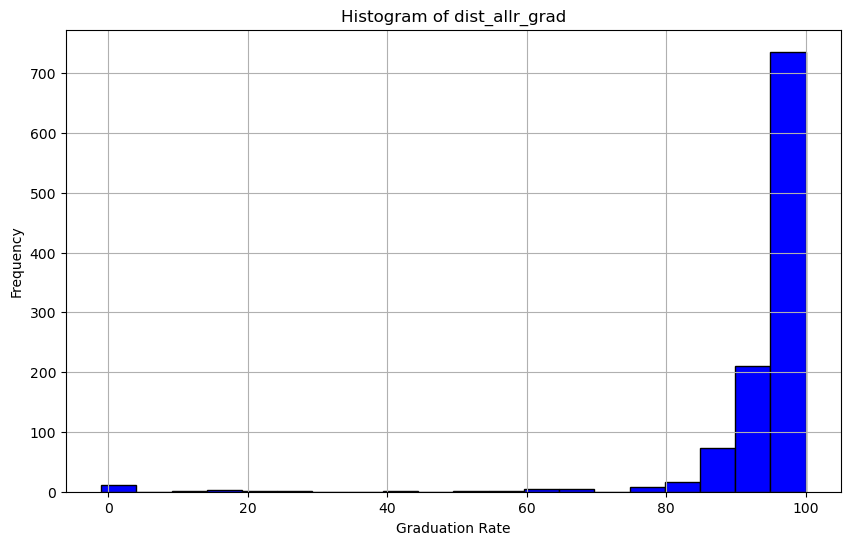

In [212]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(grad_df['dist_allr_grad'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of dist_allr_grad')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Looks like we have a few outlier graduation rates between 0 and 20. We're confident the outliers are not due to data entry errors or data corruption, but the result of actual variation in the data (i.e., some districts genuinely have very low graduation rates), and thus, they contain valuable information. Though we'll want to take note of this during the modeling stage due to the sensitivity of some models to outliers, we'll want to keep these for now to understand the factors contributing to extremely low graduation rates. 

In [213]:
# (5) Check for missing values
grad_df.isna().sum()

calc_for_state_acct    0
district_id            0
district_name          0
county                 0
county_name            0
region                 0
region_name            0
dist_allr_grad         0
dist_allr_cont         0
dist_allr_txchse       0
dist_allr_drop         0
dtype: int64

There are no missing values, which is likely the case with most of the features in our other datasets. We'll then check the datatypes and counts of each feature. 

In [214]:
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 1 to 2153
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   calc_for_state_acct  1077 non-null   object 
 1   district_id          1077 non-null   int64  
 2   district_name        1077 non-null   object 
 3   county               1077 non-null   int64  
 4   county_name          1077 non-null   object 
 5   region               1077 non-null   int64  
 6   region_name          1077 non-null   object 
 7   dist_allr_grad       1077 non-null   float64
 8   dist_allr_cont       1077 non-null   float64
 9   dist_allr_txchse     1077 non-null   object 
 10  dist_allr_drop       1077 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 101.0+ KB


**(2) SAT-ACT Scores**

We don't have data on exact SAT-ACT scores, but we do have two different rates that show a percentage of students meeting certain cutoffs. Here are the column definitions: 

Part_Rate: Percent of graduates taking the SAT and/or ACT. 

Above_Crit_Rate: Percent of graduating examinees scoring at or above 1180 (SAT total) or 24 (ACT composite). Both these scores are above the national averages. 

Above_TSI_Both_Rate: Percent of graduating examinees meeting the college-ready graduates TSI benchmarks for the SAT or the ACT on both reading/language arts and mathematics. 

We'll examine the difference between the two score rates (Above_Crit_Rate and Above_TSI_Both_Rate) to determine which is optimal for gauging student performance. 

We'll need to combine the participation rates w/ the test score rates to best reflect each district's educational outcomes. 

In [215]:
# SAT-ACT Scores Clean-Up

sat_act_df = sat_act_data_df

# (1) Drop Columns
# Drop rows where Group is not 'All Students'
sat_act_df = sat_act_df[sat_act_df['Group'] == 'All Students']
# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name',
                   'Part_Rate', 'Above_Crit_Rate', 'Above_TSI_Both_Rate']
# Drop all other columns
sat_act_df = sat_act_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'Part_Rate': 'part_rate',
    'Above_Crit_Rate': 'above_crit_rate',
    'Above_TSI_Both_Rate': 'above_tsi_both_rate'
}
# Rename the columns using the dictionary
sat_act_df = sat_act_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
sat_act_df['district_id'] = sat_act_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(sat_act_df.head())

     district_id  district_name  part_rate  above_crit_rate  \
0           1902     Cayuga ISD       63.0             10.3   
57          1903    Elkhart ISD       44.9             12.9   
114         1904  Frankston ISD       95.6             11.6   
171         1906     Neches ISD       54.2             30.8   
228         1907  Palestine ISD       36.5             29.4   

     above_tsi_both_rate  
0                   27.6  
57                  41.9  
114                 32.6  
171                 61.5  
228                 56.5  


Let's examine the two different score rates, and the outliers among both. 

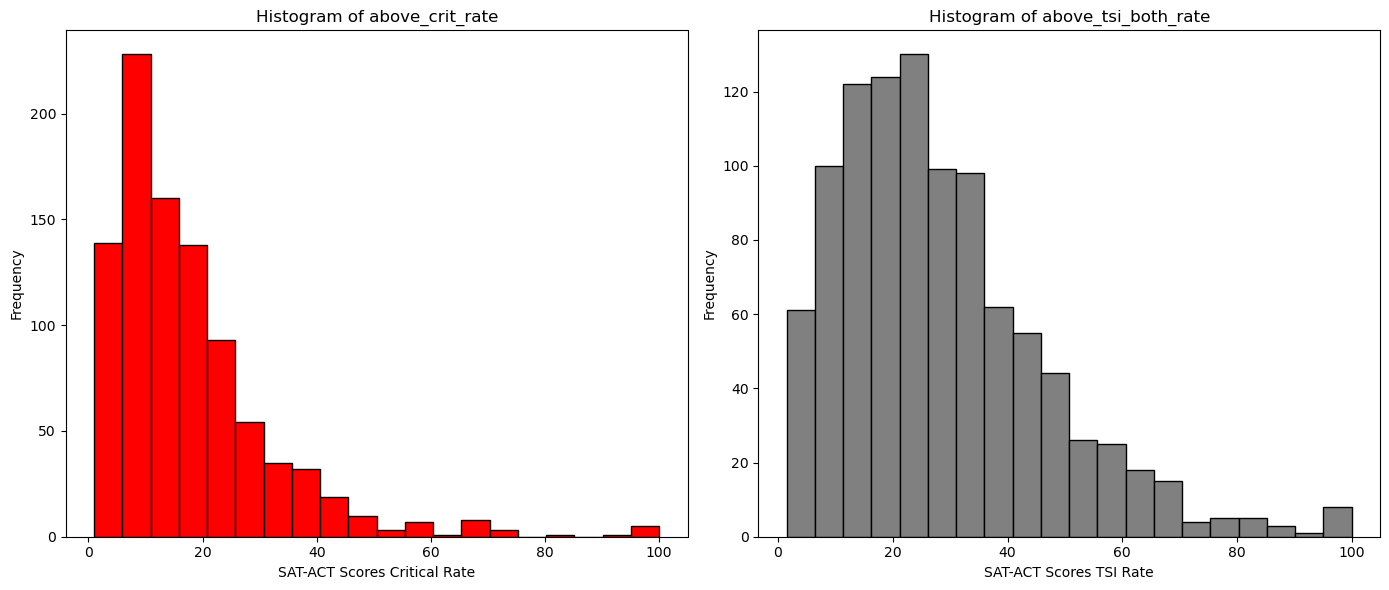

In [216]:
# (4) Outliers: Plotting the histogram

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the histogram for 'above_crit_rate' on the first subplot
axes[0].hist(sat_act_df['above_crit_rate'], bins=20, color='red', edgecolor='black')
axes[0].set_title('Histogram of above_crit_rate')
axes[0].set_xlabel('SAT-ACT Scores Critical Rate')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'above_tsi_both_rate' on the second subplot
axes[1].hist(sat_act_df['above_tsi_both_rate'], bins=20, color='grey', edgecolor='black')
axes[1].set_title('Histogram of above_tsi_both_rate')
axes[1].set_xlabel('SAT-ACT Scores TSI Rate')
axes[1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

The histogram for Above_Crit_Rate shows a bimodal distribution with a significant number of districts at the lower end of the scale and a smaller peak at the higher end near 100. This could indicate a split in the performance of districts, with some performing significantly better than others. This variable might be more straightforward for comparison and could be suitable since we're interested in factors that lead to higher-than-average SAT-ACT performance.

The histogram for Above_TSI_Both_Rate is more normally distributed with a single peak, showing that performance on the TSI benchmarks is more evenly spread across districts. This target variable includes requirements for both reading/language arts and mathematics, which could provide a more complete view of college readiness. 

However, from comparing both distributions, the TSI benchmarks appear to be less stringent than the Above_Crit_Rate scores. This indicates they may not be as high as the national average scores used in the Above_Crit_Rate, so it may be less indicative of student success, which is ultimately what we're trying to discern. 

In [217]:
# (5) Check for missing values
sat_act_df.isna().sum()

district_id              0
district_name            0
part_rate                9
above_crit_rate        141
above_tsi_both_rate     73
dtype: int64

In [248]:
# Check for datatypes
sat_act_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 61389
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   district_id          1078 non-null   int64  
 1   district_name        1078 non-null   object 
 2   part_rate            1069 non-null   float64
 3   above_crit_rate      937 non-null    float64
 4   above_tsi_both_rate  1005 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 50.5+ KB


**Choice of score rate:** Though there are a bit more missing values, we're going to choose the Above_Crit_Rate since our focus is on high achievement in standardized testing, rather than a less clearly defined college readiness indicator. 

**(3) District Funding Totals**

We'll focus on state, local, and federal funding amounts, as this gives a clear and direct measure of the funds that are most likely to impact day-to-day school operations and educational programs, which are central to student success. These categories are also more standardized in financial reporting compared to other types of disbursements, which is key for comparing across districts.

In [219]:
# District Funding Totals Clean-Up

funding_df = peims_funding_data_df

# (1) Drop Columns
# Drop rows where YEAR is not 2022
funding_df = funding_df[funding_df['YEAR'] == 2022]
# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name', 'YEAR',
                   # Enrollment Numbers: 
                   'FALL SURVEY ENROLLMENT',
                   # Local Funding Amount Columns: 
                   'GEN FUNDS-LOCAL TAX REVENUE FROM M&O', 'ALL FUNDS-LOCAL TAX REVENUE FROM M&O',
                   'GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE', 'ALL FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE',
                   'GEN FUNDS-LOCAL PROPERTY TAXES FROM I&S', 'ALL FUNDS-LOCAL PROPERTY TAXES FROM I&S',
                   # State Funding Amount Columns: 
                   'GEN FUNDS-STATE REVENUE', 'ALL FUNDS-STATE REVENUE', 'GEN FUNDS-STATE DEBT FUNDS', 
                   'ALL FUNDS-STATE DEBT FUNDS', 'GEN FUNDS-ESTIMATED STATE TRS CONTRIBUTIONS', 
                   'ALL FUNDS-ESTIMATED STATE TRS CONTRIBUTIONS',
                   'GEN FUNDS-STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34',
                   'ALL FUNDS-STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34',
                   # Federal Funding Amount Columns:
                   'GEN FUNDS-FEDERAL REVENUE', 'ALL FUNDS-FEDERAL REVENUE']
# Drop all other columns
funding_df = funding_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'YEAR': 'year',
    'FALL SURVEY ENROLLMENT': 'fall_enrollment',
    'GEN FUNDS-LOCAL TAX REVENUE FROM M&O': 'gen_funds_local_tax_mo',
    'ALL FUNDS-LOCAL TAX REVENUE FROM M&O': 'all_funds_local_tax_mo',
    'GEN FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE': 'gen_funds_other_local_revenue',
    'ALL FUNDS-OTHER LOCAL & INTERMEDIATE REVENUE': 'all_funds_other_local_revenue',
    'GEN FUNDS-LOCAL PROPERTY TAXES FROM I&S': 'gen_funds_local_tax_is',
    'ALL FUNDS-LOCAL PROPERTY TAXES FROM I&S': 'all_funds_local_tax_is',
    'GEN FUNDS-STATE REVENUE': 'gen_funds_state_revenue',
    'ALL FUNDS-STATE REVENUE': 'all_funds_state_revenue',
    'GEN FUNDS-STATE DEBT FUNDS': 'gen_funds_state_debt',
    'ALL FUNDS-STATE DEBT FUNDS': 'all_funds_state_debt',
    'GEN FUNDS-ESTIMATED STATE TRS CONTRIBUTIONS': 'gen_funds_state_trs_contrib',
    'ALL FUNDS-ESTIMATED STATE TRS CONTRIBUTIONS': 'all_funds_state_trs_contrib',
    'GEN FUNDS-STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34': 'gen_funds_state_comp_ed_expend',
    'ALL FUNDS-STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34': 'all_funds_state_comp_ed_expend',
    'GEN FUNDS-FEDERAL REVENUE': 'gen_funds_federal_revenue',
    'ALL FUNDS-FEDERAL REVENUE': 'all_funds_federal_revenue'
}
# Rename the columns using the dictionary
funding_df = funding_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
funding_df['district_id'] = funding_df['district_id'].astype(int)  # Convert to integer


# Display the first few rows of the modified dataframe
print(funding_df.head())

    district_id  district_name  year  fall_enrollment  gen_funds_local_tax_mo  \
15         1902     CAYUGA ISD  2022              574                 3094212   
31         1903    ELKHART ISD  2022             1150                 3224720   
47         1904  FRANKSTON ISD  2022              808                 2870023   
63         1906     NECHES ISD  2022              342                 1199703   
79         1907  PALESTINE ISD  2022             3360                12493095   

    all_funds_local_tax_mo  gen_funds_other_local_revenue  \
15                 3094212                         221819   
31                 3224720                         173822   
47                 2870023                          78103   
63                 1199703                          26941   
79                12493095                        1360597   

    all_funds_other_local_revenue  gen_funds_local_tax_is  \
15                        1776451                       0   
31                      

We'll leave funding amounts alone for now, but revisit them later during feature engineering. We can check the distribution of students enrolled to see where the outliers lie. 

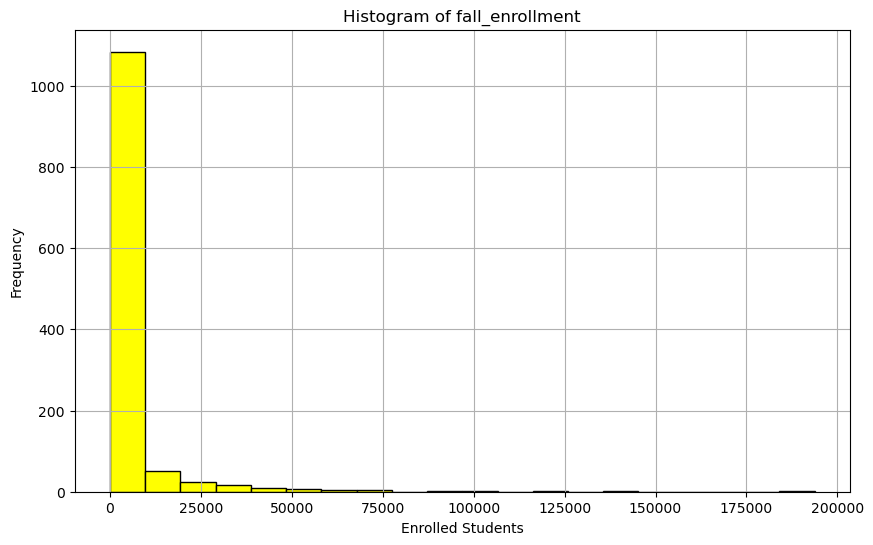

In [220]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(funding_df['fall_enrollment'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of fall_enrollment')
plt.xlabel('Enrolled Students')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Looks like enrollment numbers are extremely right skewed, so we'll examine these outliers. 

In [221]:
selected_districts = funding_df.loc[funding_df['fall_enrollment'] > 100000, ['district_name', 'fall_enrollment']]
print(selected_districts)

              district_name  fall_enrollment
1443          NORTHSIDE ISD           101584
4589             DALLAS ISD           143430
8527  CYPRESS-FAIRBANKS ISD           116913
8598            HOUSTON ISD           193727


Though these districts have much higher enrollment than other districts, these are correct amounts and will be used for multiple engineered features in a later stage, so we don't need to remove them. 

In [222]:
# (5) Check for missing values
funding_df.isna().sum()

district_id                       0
district_name                     0
year                              0
fall_enrollment                   0
gen_funds_local_tax_mo            0
all_funds_local_tax_mo            0
gen_funds_other_local_revenue     0
all_funds_other_local_revenue     0
gen_funds_local_tax_is            0
all_funds_local_tax_is            0
gen_funds_state_revenue           0
all_funds_state_revenue           0
gen_funds_state_debt              0
all_funds_state_debt              0
gen_funds_state_trs_contrib       0
all_funds_state_trs_contrib       0
gen_funds_state_comp_ed_expend    0
all_funds_state_comp_ed_expend    0
gen_funds_federal_revenue         0
all_funds_federal_revenue         0
dtype: int64

**(4) District Property Values**:

We'll focus on total property values per district, and keep the total tax rate just in case.  

In [223]:
# District Property Values Clean-Up

property_values_df = property_values_data_df

# (1) Drop Columns
# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name',
                   'Total Tax Rate ', 'Total Property Value']
# Drop all other columns
property_values_df = property_values_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name',
    'Total Tax Rate ': 'total_tax_rate',
    'Total Property Value': 'total_property_value'
}
# Rename the columns using the dictionary
property_values_df = property_values_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
property_values_df['district_id'] = property_values_df['district_id'].astype(int)  # Convert to integer


# Display the first few rows of the modified dataframe
print(property_values_df.head())

   district_id  district_name  total_tax_rate  total_property_value
0       109901     Abbott ISD          1.2145             115843601
1        95901  Abernathy ISD          1.3817             465947826
2       221901    Abilene ISD          1.2784            5394710556
3        14901    Academy ISD          1.3671             631794068
4       180903     Adrian ISD          1.2318              65809401


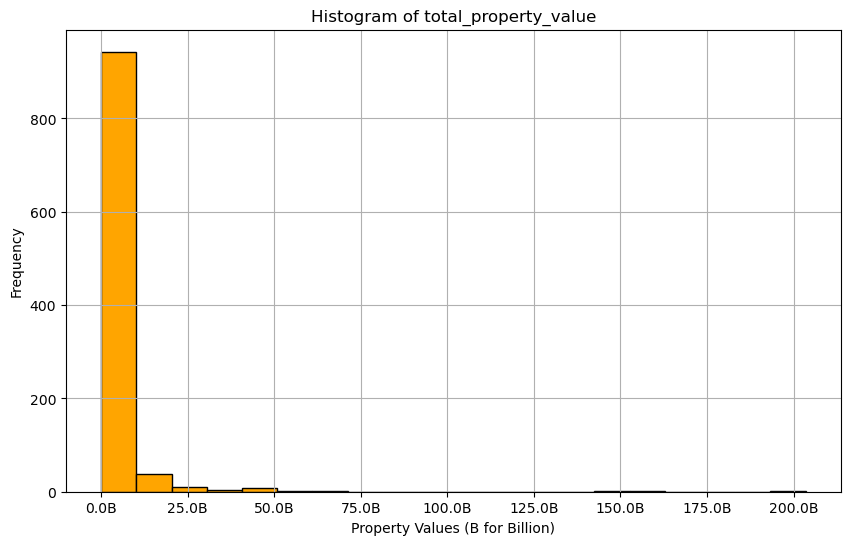

In [224]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(property_values_df['total_property_value'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of total_property_value')
plt.xlabel('Property Values (B for Billion)')
plt.ylabel('Frequency')

# Function to format the x-axis labels as billions with a 'B' suffix
def billions_formatter(x, pos):
    return '%1.1fB' % (x * 1e-9)

# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))

# Enable grid
plt.grid(True)

# Show the plot
plt.show()

Once again, we don't want to remove these outliers yet as they are legitimate property values, but it's helpful to see how extreme some property values become in certain districts. It will be interesting to see if this has any impact on student performance later. 

In [225]:
# (5) Check for missing values
property_values_df.isna().sum()

district_id             0
district_name           0
total_tax_rate          0
total_property_value    0
dtype: int64

**(5) AP-IB Scores & Participation**

We'll need both the percentages of students scoring well on AP/IB exams, and the corresponding participation rates. 

Exnees_Above_Crit_Rate: "Percent of examinees in Grades 11 and 12 scoring at or above 3 (AP) or 4 (IB) on at least one exam." 

Part_Rate: "Percent of students in Grades 11 and 12 taking at least one AP or IB exam." 

We'll want to keep the two variables as separate features in our analysis, since our hypothesis is not just that students scoring well on these exams are more likely to succeed, but also simply having the option to participate leads to better educational outcomes. 

In [226]:
# AP-IB Scores & Participation Clean-Up

ap_ib_scores_df = ap_ib_scores_data_df

# (1) Drop Columns
# Drop rows where Group is not 'All Students'
ap_ib_scores_df = ap_ib_scores_df[ap_ib_scores_df['Group'] == 'All Students']
# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name',
                   'Part_Rate', 'Exnees_Above_Crit_Rate']
# Drop all other columns
ap_ib_scores_df = ap_ib_scores_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'Part_Rate': 'part_rate',
    'Exnees_Above_Crit_Rate': 'exnees_above_crit_rate'
}
# Rename the columns using the dictionary
ap_ib_scores_df = ap_ib_scores_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
ap_ib_scores_df['district_id'] = ap_ib_scores_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(ap_ib_scores_df.head())

     district_id    district_name  part_rate  exnees_above_crit_rate
0          14909       Temple ISD       18.2                    50.5
57         15907  San Antonio ISD       24.2                    29.8
114        15916       Judson ISD       10.3                    51.3
171        21902        Bryan ISD       19.5                    48.1
228        31916  South Texas ISD       73.1                    44.2


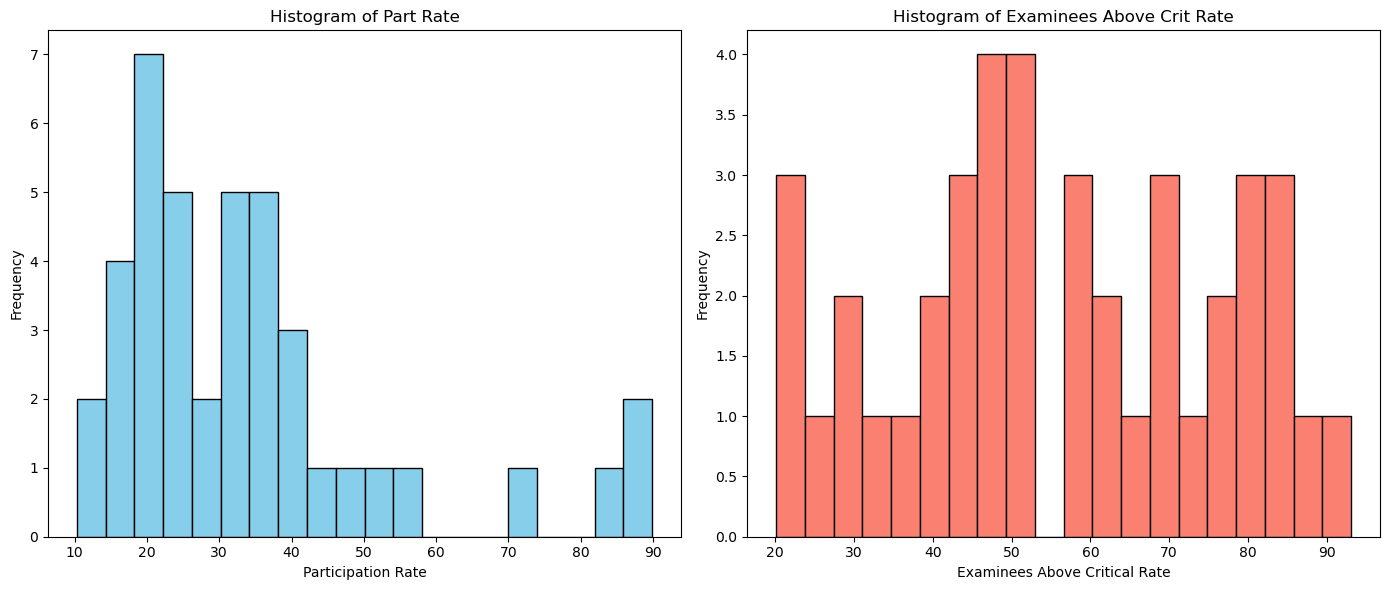

In [227]:
# (4) Outliers: Plotting the histograms
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the histogram for 'part_rate' on the first subplot
axes[0].hist(ap_ib_scores_df['part_rate'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Part Rate')
axes[0].set_xlabel('Participation Rate')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'exnees_above_crit_rate' on the second subplot
axes[1].hist(ap_ib_scores_df['exnees_above_crit_rate'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histogram of Examinees Above Crit Rate')
axes[1].set_xlabel('Examinees Above Critical Rate')
axes[1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

The multimodal nature of both distributions implies that there is no single typical value for either participation rate or critical score rate across districts; instead, there are a spread of districts across different rate intervals. 
Both histograms suggest that higher rates of participation and examinees scoring above the critical threshold are less frequent.

In [228]:
# (5) Check for missing values
ap_ib_scores_df.isna().sum()

district_id               0
district_name             0
part_rate                 0
exnees_above_crit_rate    0
dtype: int64

**(6) Teacher Count and Avg Salary:**

This has data on all staff types aside from teaching, such as admin, support, and others. We're focused on number of teachers and student-teacher ratios, so we'll exclude all but the teaching staff. 

In [229]:
# Teacher Count and Avg Salary Clean-Up

teacher_df = peims_teacher_data_df

# Drop rows where Staff is not 'TOTAL TEACHING STAFF'
teacher_df = teacher_df[teacher_df['Staff'] == 'TOTAL TEACHING STAFF']

# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name',
                   'FTE Count', 'Total Base Pay', 'Average Base Pay']

# Drop all other columns
teacher_df = teacher_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'FTE Count': 'fte_count',
    'Total Base Pay': 'total_base_pay', 
    'Average Base Pay': 'avg_base_pay'
}
# Rename the columns using the dictionary
teacher_df = teacher_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
teacher_df['district_id'] = teacher_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(teacher_df.head())

     district_id                 district_name  fte_count  total_base_pay  \
15         57816  A W BROWN LEADERSHIP ACADEMY      70.87       3678934.0   
60         57829                    A+ ACADEMY      82.37       5146393.0   
109       101871        A+ UNLIMITED POTENTIAL       8.88        568678.0   
137       109901                    ABBOTT ISD      23.56       1275795.0   
169        95901                 ABERNATHY ISD      71.96       3703323.0   

     avg_base_pay  
15        51912.0  
60        62482.0  
109       64047.0  
137       54155.0  
169       51462.0  


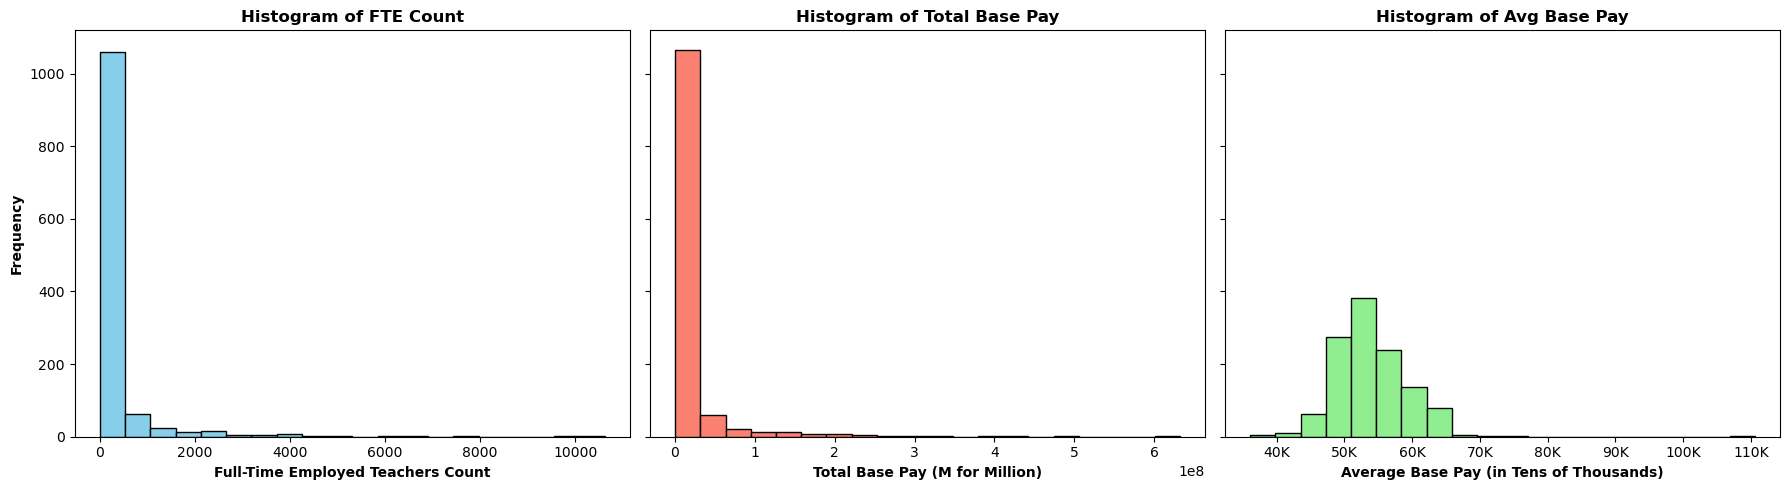

In [230]:
# (4) Outliers: Plotting the histograms

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Histogram for 'fte_count'
axes[0].hist(teacher_df['fte_count'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of FTE Count', fontweight='bold')
axes[0].set_xlabel('Full-Time Employed Teachers Count', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')

# Histogram for 'total_base_pay'
axes[1].hist(teacher_df['total_base_pay'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histogram of Total Base Pay', fontweight='bold')
axes[1].set_xlabel('Total Base Pay (M for Million)', fontweight='bold')
# Function to format the x-axis labels as millions with an 'M' suffix
def millions_formatter(x, pos):
    return '%1.1fM' % (x * 1e-6)
# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Histogram for 'avg_base_pay'
axes[2].hist(teacher_df['avg_base_pay'], bins=20, color='lightgreen', edgecolor='black')
axes[2].set_title('Histogram of Avg Base Pay', fontweight='bold')
axes[2].set_xlabel('Average Base Pay (in Tens of Thousands)', fontweight='bold')
# Function to format the x-axis labels as tens of thousands
def tens_of_thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)
# Set the formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(tens_of_thousands))

# Set the fontweight of the axis labels to bold
plt.tick_params(axis='both', which='major', labelsize=10)


# Display the histograms
plt.tight_layout()
plt.show()

The first two histograms are nearly identical, showing the vast majority of districts have a small number of full-time employed teachers and low total base pay. The Average Base Pay is more normally distributed with much less variance. We'll want to use total teachers count in feature engineering later to get a more meaningful stat per student count. 

In [231]:
# (5) Check for missing values
teacher_df.isna().sum()

district_id       0
district_name     0
fte_count         0
total_base_pay    0
avg_base_pay      0
dtype: int64

**(7) Average Daily Attendance (ADA):**

We'll keep ADA for 2021-2022. 

In [232]:
# Average Daily Attendance (ADA) Clean-Up

ada_df = ada_data_df

# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name',
                   '2021-2022 ADA']

# Drop all other columns
ada_df = ada_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    '2021-2022 ADA': '2021-2022_ada'
}
# Rename the columns using the dictionary
ada_df = ada_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
ada_df['district_id'] = ada_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(ada_df.head())

   district_id                       district_name  2021-2022_ada
0       178806  21ST CENTURY ACADEMY OF SCIENCE AN          0.000
1        57816        A W BROWN LEADERSHIP ACADEMY        880.776
2        57829                          A+ ACADEMY       1388.241
3       101871              A+ UNLIMITED POTENTIAL        132.817
4       109901                          ABBOTT ISD        263.757


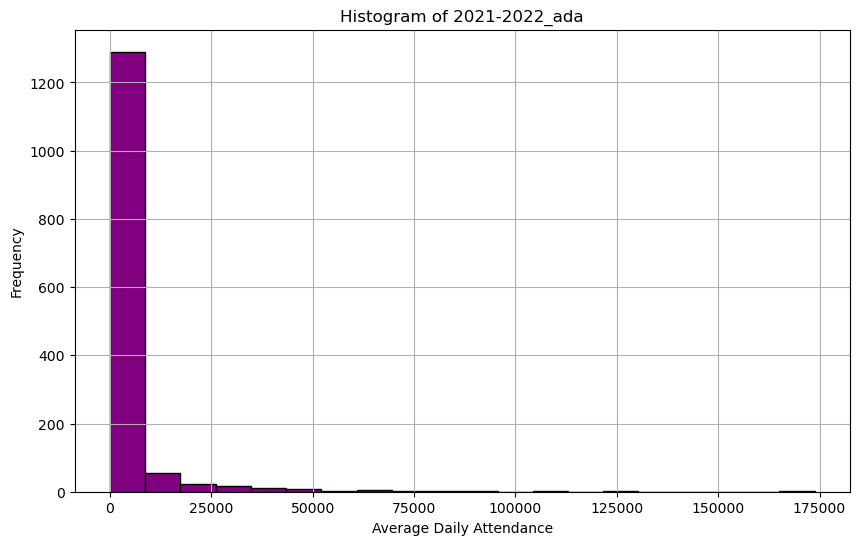

In [233]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(ada_df['2021-2022_ada'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of 2021-2022_ada')
plt.xlabel('Average Daily Attendance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Just like many of the other features, ADA is heavily skewed to the right, indicating there are huge districts with many more students than the other districts (as we've analyzed with the total enrolled metric). 

In [234]:
# (5) Check for missing values
ada_df.isna().sum()

district_id      0
district_name    0
2021-2022_ada    0
dtype: int64

**(8) Kids in Poverty:**

We'll need all but two columns in this dataset. Potential for feature engineering later. 

In [235]:
# Kids in Poverty Clean-Up

poverty_df = kids_poverty_data_df

# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name',
                   'Estimated Total Population', 'Estimated Population 5-17', 
'Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder']

# Drop all other columns
poverty_df = poverty_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'Estimated Total Population': 'estimated_total_population',
    'Estimated Population 5-17': 'estimated_population_5_17',
    'Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder': 
    'estimated_children_in_poverty_5_17'
}
# Rename the columns using the dictionary
poverty_df = poverty_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
poverty_df['district_id'] = poverty_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(poverty_df.head())

   district_id  district_name  estimated_total_population  \
0       109901     Abbott ISD                        1082   
1        95901  Abernathy ISD                        3476   
2       221901    Abilene ISD                      105506   
3        14901    Academy ISD                        9120   
4       180903     Adrian ISD                         251   

   estimated_population_5_17  estimated_children_in_poverty_5_17  
0                        185                                  18  
1                        774                                 147  
2                      17290                                3505  
3                       2076                                 216  
4                         31                                   9  


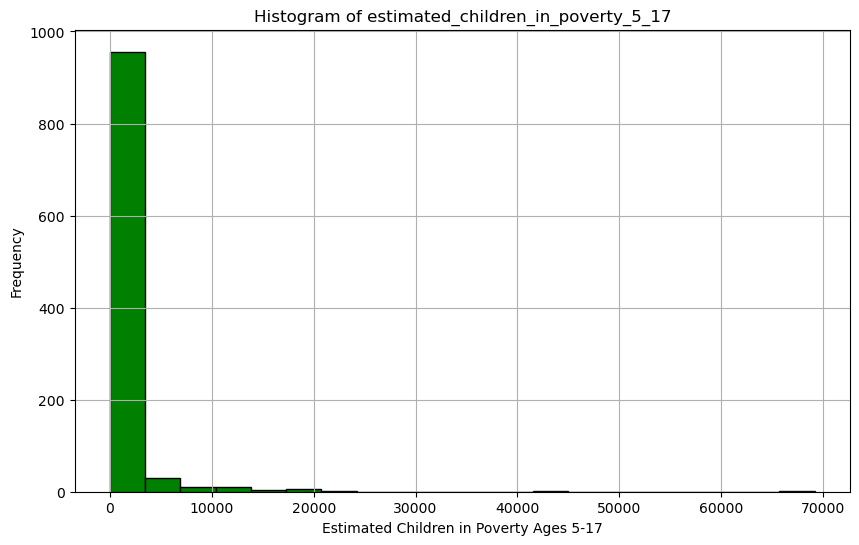

In [236]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(poverty_df['estimated_children_in_poverty_5_17'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of estimated_children_in_poverty_5_17')
plt.xlabel('Estimated Children in Poverty Ages 5-17')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram is heavily right skewed, indicating there are a small minority of districts with disproportionate amounts of children experiencing poverty. We'll want to explore the effects of this on student performance later. 

In [237]:
# (5) Check for missing values
poverty_df.isna().sum()

district_id                           0
district_name                         0
estimated_total_population            0
estimated_population_5_17             0
estimated_children_in_poverty_5_17    0
dtype: int64

**(9) Median Incomes:**

All we need are median Incomes by District, but the Score column could be interesting as it ranks the most equitable to least equitable school districts, so we'll include this as well. 

The dataset has a column for 'Expenditures for Public Elementary and Secondary Schools per Pupil', but we'll exclude this since we don't know how exactly it has been calculated, and we'll feature engineer this with our other data later. 

In [238]:
pip install fuzzywuzzy[speedup]

zsh:1: no matches found: fuzzywuzzy[speedup]
Note: you may need to restart the kernel to use updated packages.


In [239]:
# Median Incomes Clean-Up

income_df = income_data_df

# Specify the columns to keep:
columns_to_keep = ['District ID', 'District Name',
                  'Score', 'Income by School District']

# Drop all other columns
income_df = income_df[columns_to_keep]


# (2) Rename Columns for Clarity and Consistency
# Create a dictionary of old column names to new standardized ones
rename_dict = {
    'District ID': 'district_id',  
    'District Name': 'district_name', 
    'Score': 'inequality_score', 
    'Income by School District': 'income_by_district'
}
# Rename the columns using the dictionary
income_df = income_df.rename(columns=rename_dict)


# (3) Data Type Conversion
# Convert columns to appropriate data types
income_df['district_id'] = income_df['district_id'].astype(int)  # Convert to integer



# Display the first few rows of the modified dataframe
print(income_df.head())



   district_id   district_name  inequality_score  income_by_district
0       207901  Schleicher ISD              0.06               61094
1       143906      Ezzell ISD              0.07               62833
2        91901       Bells ISD              0.08               73388
3        70901      Avalon ISD              0.10               67250
4       184908     Peaster ISD              0.17               72349


We likely won't use their inequality score since the methodology for calculating is unclear, but we'll keep this feature for now to use as a potential new feature to be engineered later. 

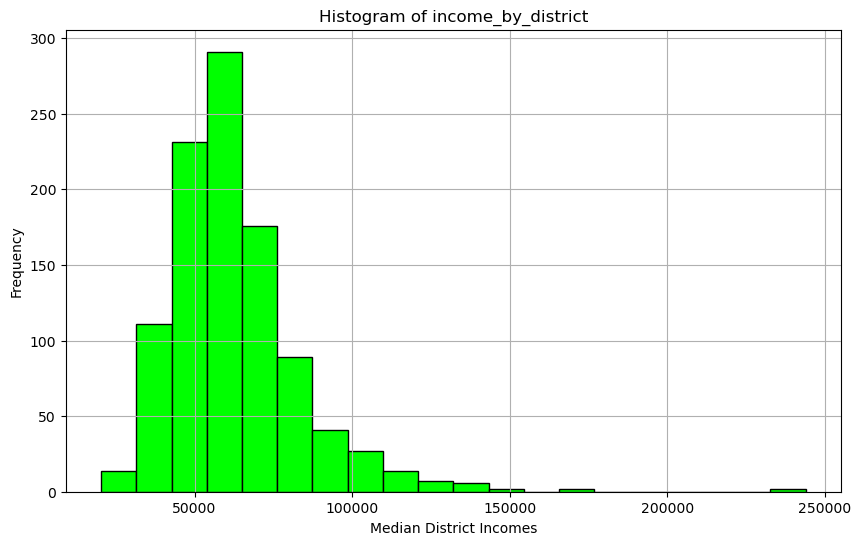

In [240]:
# (4) Outliers: Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(income_df['income_by_district'], bins=20, color='lime', edgecolor='black')
plt.title('Histogram of income_by_district')
plt.xlabel('Median District Incomes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This shows a more normal distribution than most of the other features, with some outliers on the right. We'll explore whether kids in poverty or income 

In [241]:
# (5) Check for missing values
income_df.isna().sum()

district_id           0
district_name         0
inequality_score      0
income_by_district    0
dtype: int64

We'll count the distinct district_id values for each dataset to gauge how many observations we'll end up with after joining the datasets. 

In [242]:
# Function to count distinct 'district_id' values in each dataframe
def count_distinct_ids(dataframes_info):
    counts = {}
    for df, name in dataframes_info:
        # Count distinct 'district_id' values
        unique_count = df['district_id'].nunique()
        counts[name] = unique_count
    return counts

# List of tuples (dataframe, name)
dataframes_info = [
    (grad_df, 'grad_df'),
    (sat_act_df, 'sat_act_df'),
    (funding_df, 'funding_df'),
    (property_values_df, 'property_values_df'),
    (ap_ib_scores_df, 'ap_ib_scores_df'),
    (teacher_df, 'teacher_df'),
    (ada_df, 'ada_df'),
    (poverty_df, 'poverty_df'),
    (income_df, 'income_df')
]

# Call the function and print the results
distinct_id_counts = count_distinct_ids(dataframes_info)
for name, count in distinct_id_counts.items():
    print(f"Distinct 'district_id' count in {name}: {count}")

Distinct 'district_id' count in grad_df: 1077
Distinct 'district_id' count in sat_act_df: 1078
Distinct 'district_id' count in funding_df: 1206
Distinct 'district_id' count in property_values_df: 1007
Distinct 'district_id' count in ap_ib_scores_df: 41
Distinct 'district_id' count in teacher_df: 1203
Distinct 'district_id' count in ada_df: 1416
Distinct 'district_id' count in poverty_df: 1018
Distinct 'district_id' count in income_df: 1013


The ap_ib_scores_df dataset appears to have an extremely low number of districts, let's see which districts are present. 

In [243]:
ap_ib_scores_df['district_name']

0                            Temple ISD
57                      San Antonio ISD
114                          Judson ISD
171                           Bryan ISD
228                     South Texas ISD
285                           Allen ISD
342                          Frisco ISD
399                           Plano ISD
456                    Uplift Education
513       Carrollton-Farmers Branch ISD
570                          Dallas ISD
627                         Garland ISD
684                         Coppell ISD
741                          Denton ISD
798                    Ector County ISD
855                         El Paso ISD
912                         Socorro ISD
969                        Longview ISD
1026          Schertz-Cibolo-U City ISD
1083                         Aldine ISD
1140                        Houston ISD
1197                         Humble ISD
1254                          Klein ISD
1311                  Spring Branch ISD
1368                IDEA Public Schools


Though it would be beneficial to see how participation in advanced courses and testing correlates to student success, the number of observations are far too low for our analysis, so we'll exclude this dataset in our join. 

**Ensure consistency within district_id column values:**

We've also verified that each dataset contains the necessary key column for joining (district_id), and we've converted these to integers, but let's ensure consistency among the column values across datasets. 

In [250]:
def find_id_consistency(*dataframes):
    # Create a set with all unique district_ids from the first dataframe
    common_ids = set(dataframes[0]['district_id'].unique())
    
    # Intersect this set with sets of unique district_ids from all other dataframes
    for df in dataframes[1:]:
        common_ids &= set(df['district_id'].unique())
    
    # Now common_ids contains only the district_ids that are present in every dataframe
    # The inconsistent ids are those that are not in the intersection
    total_consistent = len(common_ids)
    total_inconsistent = sum(len(set(df['district_id'].unique())) for df in dataframes) - total_consistent * 9
    
    return total_consistent, total_inconsistent

# List of your dataframes
dataframes = [grad_df, sat_act_df, funding_df, property_values_df, 
              teacher_df, ada_df, poverty_df, income_df]

# Calculate the consistent and inconsistent district_id values
total_consistent, total_inconsistent = find_id_consistency(*dataframes)

print(f"Total consistent district_id values: {total_consistent}")
print(f"Total inconsistent district_id values: {total_inconsistent}")

Total consistent district_id values: 952
Total inconsistent district_id values: 450


We have over 950 unique observations consistent across all datasets, which isn't too far removed from the roughly 1,200 total districts. However, we'll want to see how this performs in the modeling stage, as the data quantity may be insufficient for predictive purposes. A bulk of the 450 inconsistent district_id values come from 1-2 datasets with a few hundred more districts than are actually present in TX, which aren't useful for our analysis anyway. 

### Join Datasets: <a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

Now we'll merge all nine datasets together on district_id column (again we're excluding ap_ib_scores_df due to too few observations). 

In [245]:
from functools import reduce
import pandas as pd

# Function to join dataframes on 'district_id'
def merge_dfs_on_column(dataframes, column_name, join_type='inner'):
    # Use functools.reduce to iteratively merge dataframes
    # Define custom suffixes to avoid conflicts
    suffixes = [f"_{i}" for i in range(len(dataframes))]
    first_df = dataframes[0]
    remaining_dfs = dataframes[1:]
    
    merged_df = first_df
    for i, df in enumerate(remaining_dfs):
        # Generate unique suffixes for this merge to prevent name conflicts
        merge_suffixes = ('', suffixes[i + 1])
        merged_df = pd.merge(merged_df, df, on=column_name, how=join_type, suffixes=merge_suffixes)
    return merged_df

# List of your dataframes
dfs = [grad_df, sat_act_df, funding_df, property_values_df, 
       teacher_df, ada_df, poverty_df, income_df]

# Perform the merge
all_data_merged = merge_dfs_on_column(dfs, 'district_id')

# Display the head of the merged dataframe to check
print(all_data_merged.head())

  calc_for_state_acct  district_id  district_name  county      county_name  \
0                 Yes         1902     Cayuga ISD       1  Anderson County   
1                 Yes         1903    Elkhart ISD       1  Anderson County   
2                 Yes         1904  Frankston ISD       1  Anderson County   
3                 Yes         1906     Neches ISD       1  Anderson County   
4                 Yes         1907  Palestine ISD       1  Anderson County   

   region region_name  dist_allr_grad  dist_allr_cont dist_allr_txchse  ...  \
0       7     Kilgore            97.8             0.0              0.0  ...   
1       7     Kilgore           100.0             0.0              0.0  ...   
2       7     Kilgore            97.8             0.0              2.2  ...   
3       7     Kilgore           100.0             0.0              0.0  ...   
4       7     Kilgore            95.9             4.1              0.0  ...   

   avg_base_pay district_name_5  2021-2022_ada  district

In [246]:
# Placeholder for future use: 
# Detect and Handle Outliers
# Placeholder function to detect outliers - replace with actual logic
# def detect_outliers(series):
    # Implement outlier detection, e.g., using IQR
    # Q1 = series.quantile(0.25)
    # Q3 = series.quantile(0.75)
    # IQR = Q3 - Q1
    # return ~((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR)))

# Apply outlier detection function to the relevant columns
# Drop rows with outliers in the specified column
# income_df = income_df[detect_outliers(income_df['your_numerical_column'])]